In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [2]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training12.csv")
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
0,0.288964,0.288900,0.237060,0.751485,0.490417,0.871241,0.865572,0.127085,0.386851,0.0,...,0.878061,0,0.000000,0.0,0.0,0.0,0.878061,0.0,0,208500
1,0.089223,0.343729,0.262077,0.610590,0.764289,0.820615,0.815275,0.000000,0.514486,0.0,...,0.842986,0,0.000000,0.0,0.0,0.0,0.842986,0.0,0,181500
2,0.277911,0.287757,0.312420,0.717292,0.467697,0.830206,0.825241,0.101427,0.257144,0.0,...,0.847863,0,0.000000,0.0,0.0,0.0,0.847863,0.0,0,223500
3,0.323125,0.252112,0.260167,0.716555,0.467473,0.792212,0.810866,0.000000,0.113340,0.0,...,0.840844,0,0.846186,0.0,0.0,0.0,0.000000,0.0,0,140000
4,0.249337,0.320285,0.360368,0.735365,0.415464,0.737297,0.732499,0.197518,0.312378,0.0,...,0.764231,0,0.000000,0.0,0.0,0.0,0.764231,0.0,0,250000


In [3]:
corr=df.corr()

In [4]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan,SalePrice
SalePrice,-0.142333,0.153551,0.334565,0.524853,-0.315803,-0.472650,-0.499125,0.430345,0.332447,-0.033716,...,-0.354417,NaN,-0.131030,-0.050800,-0.019783,-0.048756,-0.249486,0.333237,NaN,1.000000
GrLivArea,0.120719,0.127222,0.008331,0.458779,-0.189161,-0.218697,-0.219837,0.314464,0.031921,-0.061258,...,-0.151926,NaN,-0.057856,-0.043154,0.007535,-0.002907,-0.103951,0.118027,NaN,0.607572
BsmtQual_Ex,-0.067336,0.110156,0.067300,0.348260,-0.213320,-0.159737,-0.176944,0.292843,0.219931,-0.043845,...,-0.294995,NaN,-0.055523,-0.015651,-0.027086,-0.035153,-0.231383,0.342712,NaN,0.530566
TotalBsmtSF,-0.249588,0.188220,0.075357,0.407939,-0.225604,-0.121166,-0.151733,0.281911,0.423329,0.085864,...,-0.222430,NaN,-0.033628,-0.063965,-0.074703,0.025350,-0.163098,0.229862,NaN,0.526490
GarageCars,-0.018763,0.150428,0.031077,0.494672,-0.234319,-0.088925,-0.128104,0.308173,0.161393,-0.066607,...,-0.213203,NaN,-0.114808,-0.109711,0.015857,-0.012673,-0.130096,0.257483,NaN,0.524947
OverallQual,0.168467,0.066253,-0.315555,1.000000,0.013580,0.245853,0.217332,0.300476,0.115412,-0.102320,...,-0.132284,NaN,-0.088225,-0.040849,-0.075064,-0.019867,-0.064936,0.266964,NaN,0.524853
GarageArea,-0.093239,0.183610,0.084616,0.432730,-0.215405,-0.131911,-0.167525,0.309273,0.214881,-0.039942,...,-0.235569,NaN,-0.102522,-0.106532,-0.014841,-0.017159,-0.141364,0.262419,NaN,0.524351
KitchenQual_Ex,-0.045219,0.075053,0.082089,0.310253,-0.121018,-0.163811,-0.169290,0.214144,0.184403,-0.036469,...,-0.210962,NaN,0.004694,-0.014103,-0.024406,-0.031675,-0.205273,0.250091,NaN,0.481160
1stFlrSF,-0.239974,0.213064,0.017884,0.329802,-0.200665,-0.126223,-0.145328,0.251188,0.333430,0.065461,...,-0.210962,NaN,-0.033945,-0.040522,0.046827,0.030706,-0.160864,0.182668,NaN,0.467500
Foundation_PConc,0.095374,0.006098,-0.093198,0.553635,-0.264221,0.063893,0.026830,0.159577,0.056796,-0.147740,...,-0.176319,NaN,-0.095768,0.007612,-0.043421,-0.035719,-0.139283,0.306872,NaN,0.443080


In [5]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [6]:
base_models = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
    ('svr', SVR(kernel='rbf'))
]
meta_model = LinearRegression()
model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

In [7]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'BsmtQual_Ex', 'TotalBsmtSF', 'GarageCars',
       'OverallQual', 'GarageArea', 'KitchenQual_Ex', '1stFlrSF',
       'Foundation_PConc'],
      dtype='object')

In [9]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,22546.582463,36549.261988,0.825842
1,11,22377.371632,36406.118974,0.827204
2,12,23788.787865,38895.097179,0.802769
3,13,23496.471642,37612.123827,0.815566
4,14,23384.114207,37905.388754,0.812678
...,...,...,...,...
105,115,20204.719153,33940.356293,0.849818
106,116,20847.953848,35877.102467,0.832189
107,117,20890.270271,36042.529689,0.830638
108,118,20874.919576,36047.838526,0.830588


In [10]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
41,51,18660.620919,29930.478040,0.883208
36,46,18698.741859,30705.258750,0.877083
55,65,18745.527937,31039.626036,0.874391
34,44,18755.832632,30597.299570,0.877946
42,52,18812.171402,30983.431130,0.874846
...,...,...,...,...
0,10,22546.582463,36549.261988,0.825842
5,15,23046.627808,36470.025066,0.826596
4,14,23384.114207,37905.388754,0.812678
3,13,23496.471642,37612.123827,0.815566


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


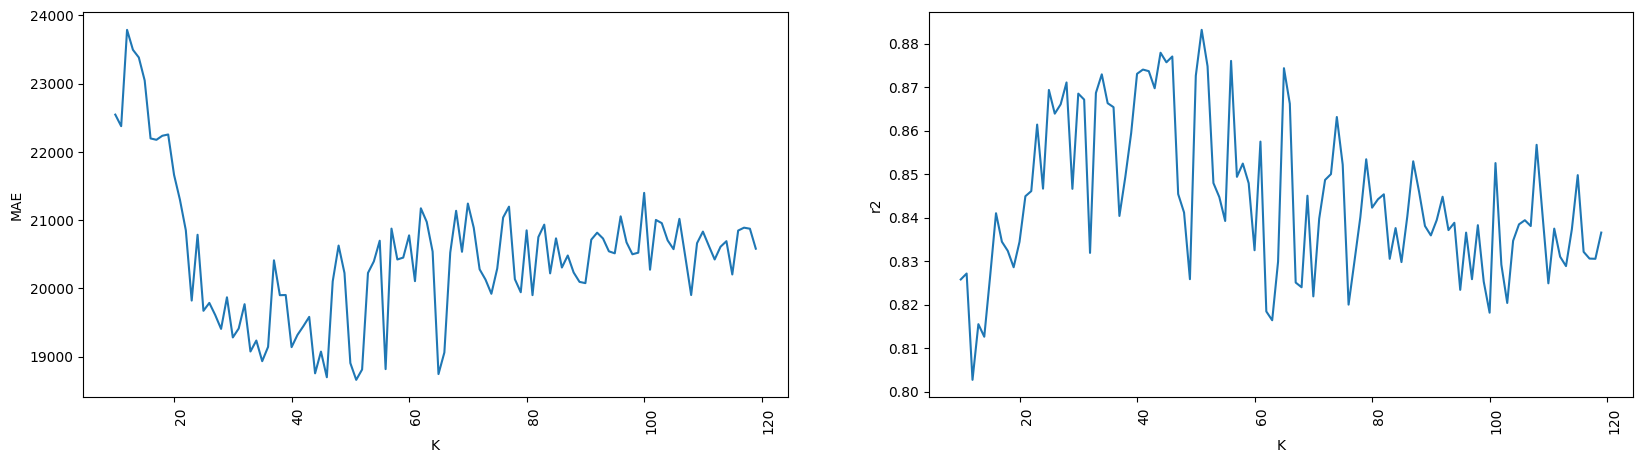

In [11]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [12]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass               4.528134e-02
LotFrontage              7.087096e-03
LotArea                  1.397675e-02
OverallQual              1.971269e-02
OverallCond              1.660969e-02
                             ...     
SaleCondition_Family     1.050945e-02
SaleCondition_Normal     1.118082e-01
SaleCondition_Partial    5.743050e-02
SaleCondition_nan        0.000000e+00
SalePrice                6.306789e+09
Length: 305, dtype: float64

In [13]:
varr.loc[varr > 0.1].index

Index(['MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'BldgType_1Fam', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleCondition_Normal', 'SalePrice'],
      dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg',
       'LotConfig_Corner', 'LotConfig_Inside', 'Neighborhood_NAmes',
       'BldgType_1Fam', 'HouseStyle_1Story', 'HouseStyle_2Story',
       'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd',
       'ExterQual_Gd', 'ExterQual_TA', 'Foundation_CBlock', 'Foundation_PConc',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd', 'HeatingQC_TA',
       'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleCondition_Normal', 'SalePrice'],
      dtype='object')

In [16]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,19021.046213,29999.592722,0.882668
1,101,19021.046213,29999.592722,0.882668
2,102,19021.046213,29999.592722,0.882668
3,103,19021.046213,29999.592722,0.882668
4,104,18755.355949,30301.693837,0.880293
...,...,...,...,...
395,495,19290.264166,31255.683220,0.872637
396,496,19290.264166,31255.683220,0.872637
397,497,19290.264166,31255.683220,0.872637
398,498,19290.264166,31255.683220,0.872637


In [17]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
12,112,18755.355949,30301.693837,0.880293
16,116,18755.355949,30301.693837,0.880293
15,115,18755.355949,30301.693837,0.880293
14,114,18755.355949,30301.693837,0.880293
13,113,18755.355949,30301.693837,0.880293
...,...,...,...,...
260,360,19920.691962,32193.456095,0.864879
261,361,19920.691962,32193.456095,0.864879
264,364,19920.691962,32193.456095,0.864879
262,362,19920.691962,32193.456095,0.864879


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


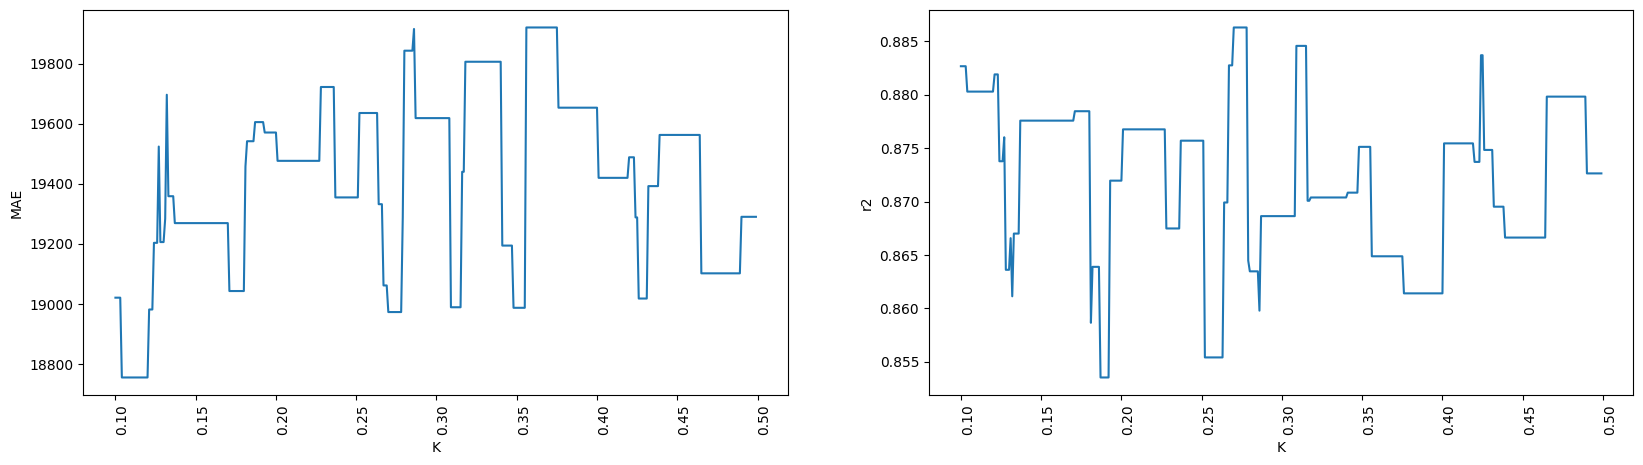

In [18]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


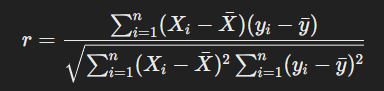

### Using numpy

In [19]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [20]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.5248525198657469


In [21]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\2326211799.py:6: RuntimeWarning: invalid value encountered in scalar divide
  return up/down


[['GrLivArea', 0.6075721273224743]]

### Using sklearn

In [22]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'BsmtQual_Ex'], dtype=object)

In [23]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


,K,MAE,RMSE,r2
0,5,23353.083200,36670.160735,0.824688
1,6,23295.836832,37513.924066,0.816527
2,7,22478.533347,36857.166477,0.822895
3,8,22664.695265,36558.330806,0.825756
4,9,22436.619454,36424.712262,0.827027
...,...,...,...,...
110,115,20759.739209,35542.892516,0.835301
111,116,20755.052372,35281.750443,0.837712
112,117,20465.651350,35094.445317,0.839431
113,118,20499.968267,34751.214917,0.842556


In [24]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
65,70,18282.678012,30286.108881,0.880416
56,61,18352.737099,30631.547015,0.877673
62,67,18408.756878,31048.131713,0.874323
67,72,18417.036535,30645.279602,0.877563
71,76,18467.916264,31701.207886,0.868980
...,...,...,...,...
1,6,23295.836832,37513.924066,0.816527
7,12,23297.152824,37496.940034,0.816694
0,5,23353.083200,36670.160735,0.824688
8,13,23382.822611,37923.226818,0.812502


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


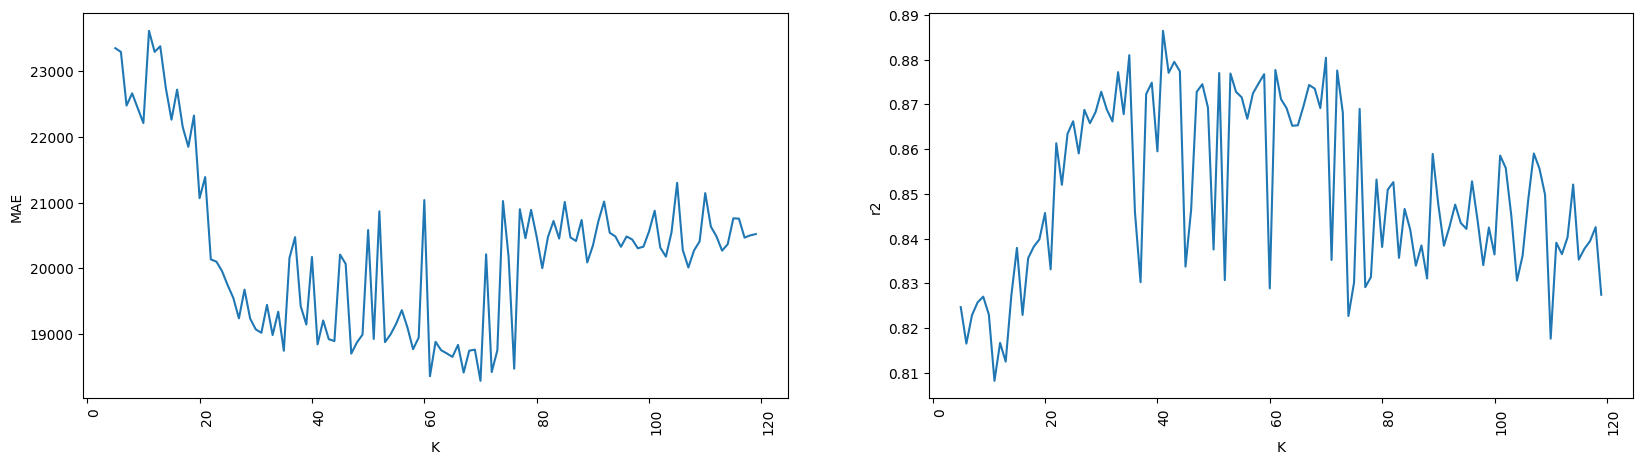

In [25]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

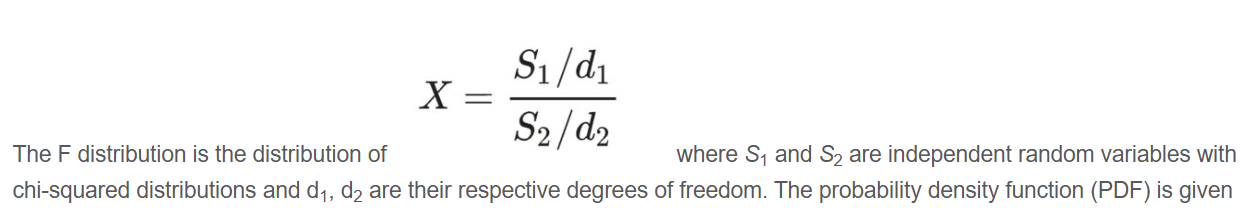

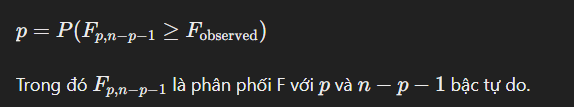

In [26]:
from sklearn.feature_selection import f_regression

In [27]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

,K,MAE,RMSE,r2
0,5,25759.391278,39814.530602,0.793334
1,6,25426.893782,39494.601744,0.796642
2,7,24111.133819,34691.487487,0.843097
3,8,22145.638281,33361.639058,0.854895
4,9,22609.179817,33599.035521,0.852823
...,...,...,...,...
110,115,19409.807793,30605.178044,0.877883
111,116,19915.852743,33179.947707,0.856472
112,117,19260.679370,31015.383470,0.874588
113,118,19393.368716,32604.773124,0.861405


In [28]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
58,63,16726.549765,27910.811691,0.898438
76,81,16727.213566,27590.786620,0.900754
77,82,16794.779863,28345.674439,0.895249
66,71,16810.332855,27845.183019,0.898915
78,83,16823.680291,28775.832052,0.892045
...,...,...,...,...
3,8,22145.638281,33361.639058,0.854895
4,9,22609.179817,33599.035521,0.852823
2,7,24111.133819,34691.487487,0.843097
1,6,25426.893782,39494.601744,0.796642


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


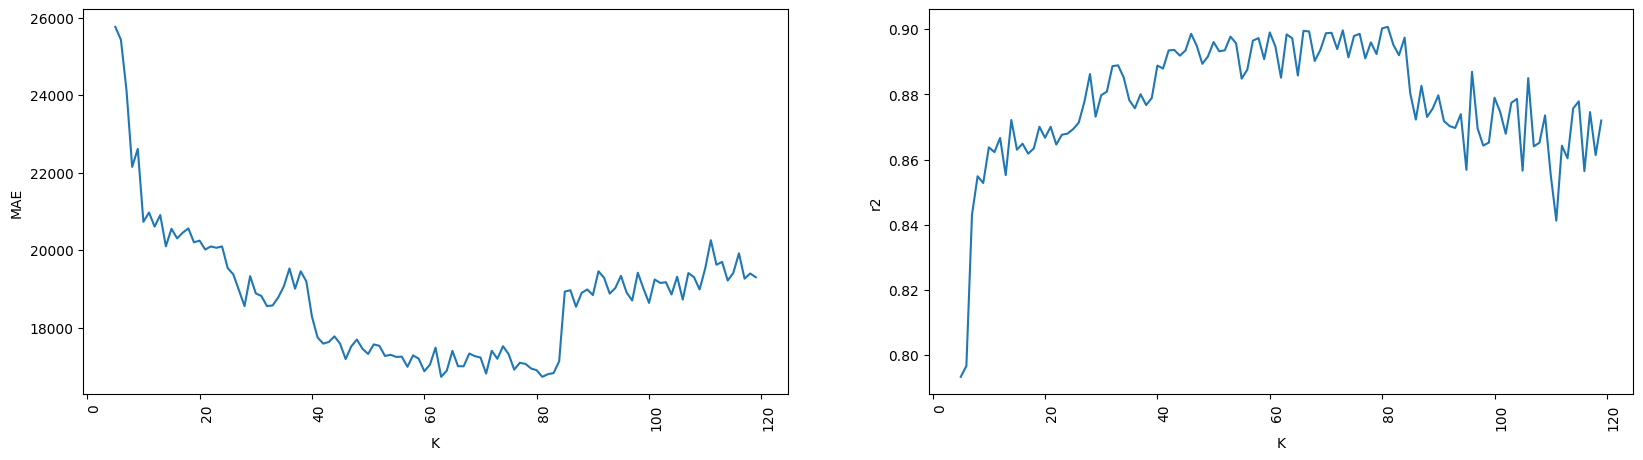

In [29]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

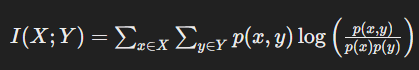

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

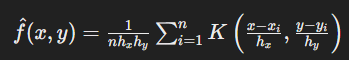

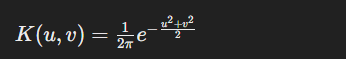

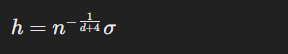

In [30]:
all_col=df.columns
all_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_WD', 'SaleType_nan', 'SaleCondition_Abnorml',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'SaleCondition_nan',
       'SalePrice'],
      dtype='object', length=305)

In [31]:
from sklearn.feature_selection import mutual_info_regression

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,5,29698.329551,44681.054141,0.739725
1,6,29058.943110,43602.396922,0.752140
2,7,27457.623691,40958.868480,0.781283
3,8,26931.400448,39381.211225,0.797808
4,9,27644.251445,40936.337930,0.781524
...,...,...,...,...
110,115,19685.878439,32206.341451,0.864771
111,116,19744.680486,32661.723483,0.860920
112,117,19371.302036,31155.164342,0.873455
113,118,19428.673838,31406.787574,0.871402


In [33]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [34]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
90,95,17079.198996,28326.617631,0.895389
85,90,17249.227452,29476.036174,0.886728
86,91,17441.139953,29067.705740,0.889844
93,98,17452.756495,29322.415445,0.887905
79,84,17494.992950,29007.458309,0.890300
...,...,...,...,...
4,9,27644.251445,40936.337930,0.781524
5,10,27734.997765,41611.391002,0.774259
6,11,28035.007012,41459.902974,0.775900
1,6,29058.943110,43602.396922,0.752140


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_4756\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


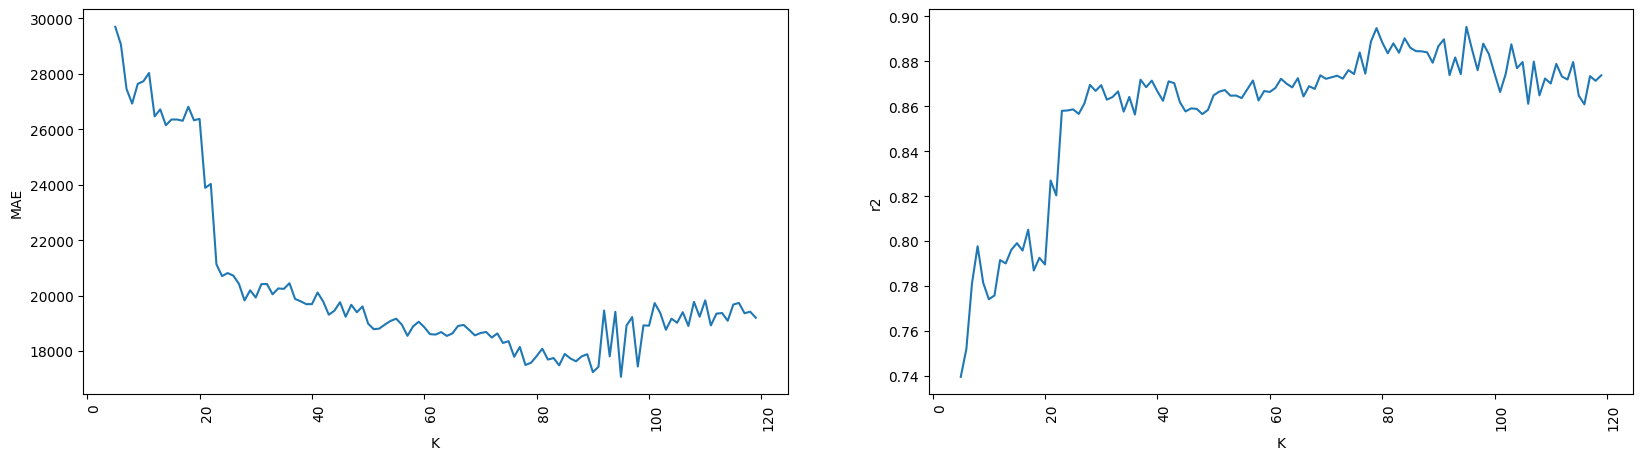

In [35]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [36]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,23353.083200,36670.160735,0.824688
1,6,23295.836832,37513.924066,0.816527
2,7,22478.533347,36857.166477,0.822895
3,8,22664.695265,36558.330806,0.825756
4,9,22436.619454,36424.712262,0.827027
...,...,...,...,...
110,115,20759.739209,35542.892516,0.835301
111,116,20755.052372,35281.750443,0.837712
112,117,20465.651350,35094.445317,0.839431
113,118,20499.968267,34751.214917,0.842556


In [37]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,25759.391278,39814.530602,0.793334
1,6,25426.893782,39494.601744,0.796642
2,7,24111.133819,34691.487487,0.843097
3,8,22145.638281,33361.639058,0.854895
4,9,22609.179817,33599.035521,0.852823
...,...,...,...,...
110,115,19409.807793,30605.178044,0.877883
111,116,19915.852743,33179.947707,0.856472
112,117,19260.679370,31015.383470,0.874588
113,118,19393.368716,32604.773124,0.861405


In [38]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,29698.329551,44681.054141,0.739725
1,6,29058.943110,43602.396922,0.752140
2,7,27457.623691,40958.868480,0.781283
3,8,26931.400448,39381.211225,0.797808
4,9,27644.251445,40936.337930,0.781524
...,...,...,...,...
110,115,19685.878439,32206.341451,0.864771
111,116,19744.680486,32661.723483,0.860920
112,117,19371.302036,31155.164342,0.873455
113,118,19428.673838,31406.787574,0.871402


In [39]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,23353.083200,36670.160735,0.824688,25759.391278,39814.530602,0.793334
1,6,23295.836832,37513.924066,0.816527,25426.893782,39494.601744,0.796642
2,7,22478.533347,36857.166477,0.822895,24111.133819,34691.487487,0.843097
3,8,22664.695265,36558.330806,0.825756,22145.638281,33361.639058,0.854895
4,9,22436.619454,36424.712262,0.827027,22609.179817,33599.035521,0.852823
...,...,...,...,...,...,...,...
110,115,20759.739209,35542.892516,0.835301,19409.807793,30605.178044,0.877883
111,116,20755.052372,35281.750443,0.837712,19915.852743,33179.947707,0.856472
112,117,20465.651350,35094.445317,0.839431,19260.679370,31015.383470,0.874588
113,118,20499.968267,34751.214917,0.842556,19393.368716,32604.773124,0.861405


In [40]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,23353.083200,36670.160735,0.824688,25759.391278,39814.530602,0.793334,29698.329551,44681.054141,0.739725
1,6,23295.836832,37513.924066,0.816527,25426.893782,39494.601744,0.796642,29058.943110,43602.396922,0.752140
2,7,22478.533347,36857.166477,0.822895,24111.133819,34691.487487,0.843097,27457.623691,40958.868480,0.781283
3,8,22664.695265,36558.330806,0.825756,22145.638281,33361.639058,0.854895,26931.400448,39381.211225,0.797808
4,9,22436.619454,36424.712262,0.827027,22609.179817,33599.035521,0.852823,27644.251445,40936.337930,0.781524
...,...,...,...,...,...,...,...,...,...,...
110,115,20759.739209,35542.892516,0.835301,19409.807793,30605.178044,0.877883,19685.878439,32206.341451,0.864771
111,116,20755.052372,35281.750443,0.837712,19915.852743,33179.947707,0.856472,19744.680486,32661.723483,0.860920
112,117,20465.651350,35094.445317,0.839431,19260.679370,31015.383470,0.874588,19371.302036,31155.164342,0.873455
113,118,20499.968267,34751.214917,0.842556,19393.368716,32604.773124,0.861405,19428.673838,31406.787574,0.871402


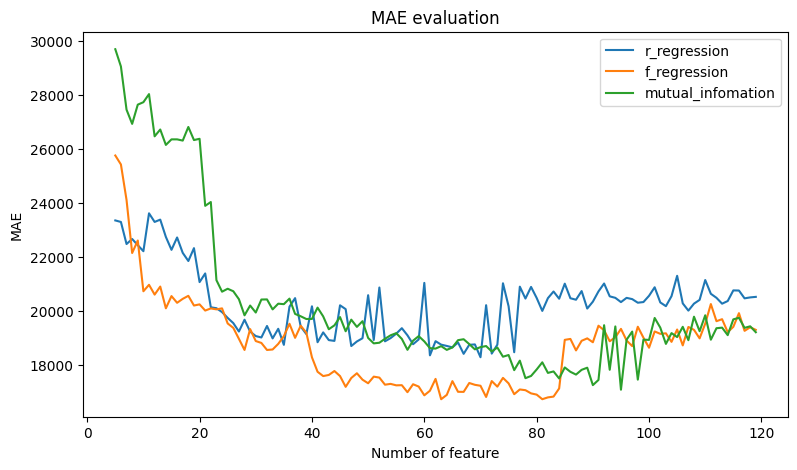

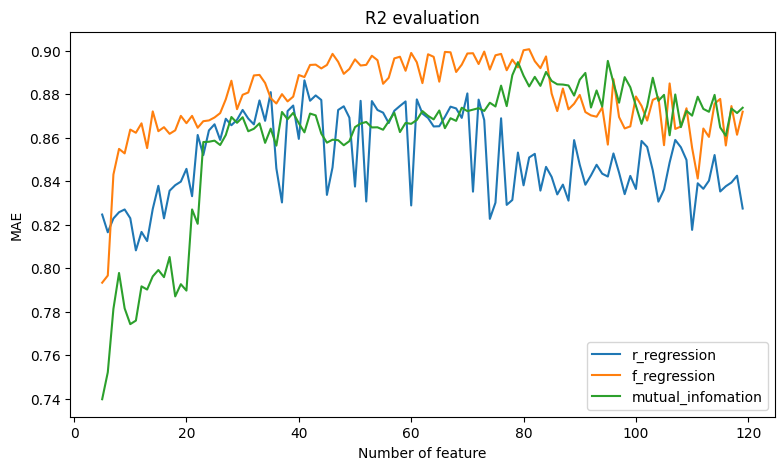

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()